In [1]:
# importing dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# data collection and analysis
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes predection/diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
# getting statical measures of the data
diabetes_dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [7]:
# here 0 stand for non diabetes and 1 stand for diabetes

In [8]:
# saparating the data and lables

X = diabetes_dataset.drop(columns = 'Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [11]:
# data standardization ( preprocessing )

# scaler = StandardScaler()

In [12]:
# scaler.fit(X)

In [13]:
# standardized_data = scaler.transform(X)

In [14]:
# print(standardized_data)

In [15]:
# X = standardized_data
# Y = diabetes_dataset['Outcome']

In [16]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
# train test and split

In [18]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y,random_state=2)

In [19]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [20]:
# training the model

In [21]:
classifier = svm.SVC(kernel='linear')

In [22]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [23]:
# model evaluation


In [24]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [25]:
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [26]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [27]:
print('Accuracy score of the test data : ',test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [28]:
confusion_matrix(X_test_prediction,Y_test)

array([[91, 26],
       [ 9, 28]])

<Axes: >

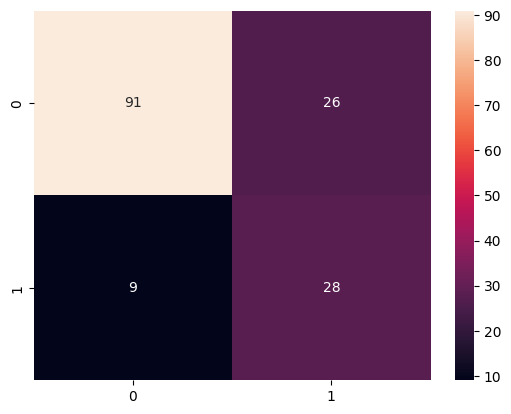

In [29]:
sns.heatmap(confusion_matrix(X_test_prediction,Y_test), annot=True)

In [30]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       117
           1       0.52      0.76      0.62        37

    accuracy                           0.77       154
   macro avg       0.71      0.77      0.73       154
weighted avg       0.82      0.77      0.79       154



In [31]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
Y2_pred = model2.predict(X_test)

In [33]:
accuracy_score(Y2_pred,Y_test)

0.7532467532467533

In [34]:
confusion_matrix(Y2_pred,Y_test)

array([[88, 26],
       [12, 28]])

<Axes: >

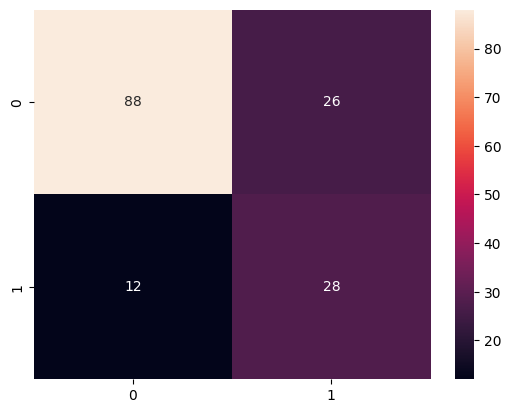

In [35]:
sns.heatmap(confusion_matrix(Y2_pred,Y_test), annot=True)

In [36]:
print(classification_report(Y2_pred,Y_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       114
           1       0.52      0.70      0.60        40

    accuracy                           0.75       154
   macro avg       0.70      0.74      0.71       154
weighted avg       0.79      0.75      0.76       154



In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
models = {
    "Logistic regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "SVM" : svm.SVC()
}
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
model5 = KNeighborsClassifier()
model6 = svm.SVC()

In [39]:
result = []

In [40]:
for name, model in models.items():
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_pred, Y_test)
  f1_Score = f1_score(y_pred,Y_test)
  result.append({
      'model_name' : name,
      'accuracy' : round(accuracy,4),
      'f1_score' : round(f1_Score,4)
  })

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
result

[{'model_name': 'Logistic regression', 'accuracy': 0.7532, 'f1_score': 0.5957},
 {'model_name': 'KNN', 'accuracy': 0.7273, 'f1_score': 0.5333},
 {'model_name': 'Naive Bayes', 'accuracy': 0.7727, 'f1_score': 0.6392},
 {'model_name': 'Decision Tree', 'accuracy': 0.6948, 'f1_score': 0.5155},
 {'model_name': 'SVM', 'accuracy': 0.7857, 'f1_score': 0.6118}]

In [42]:
from sklearn.ensemble import VotingClassifier

In [43]:
ensemble = VotingClassifier(estimators=[('svc', classifier), ('Nb', model3), ('lr',model2)], voting='hard')

In [44]:
ensemble.fit(X_train, Y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('svc', SVC(kernel='linear')),
                             ('Nb', GaussianNB()),
                             ('lr', LogisticRegression())])

In [45]:
print(f'accuracy of ensemble model is {ensemble.score(X_test, Y_test)}')

accuracy of ensemble model is 0.7597402597402597


In [46]:
# making predictive System

In [47]:
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing input_data into numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print('the preson is not diabetic')
else:
  print('the person is diabetic')


[0]
the preson is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [48]:
# saving the train model

In [49]:
import pickle

In [50]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename,'wb'))

In [51]:
# loading the saved model

loaded_model = pickle.load(open('trained_model.sav','rb'))

In [52]:
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing input_data into numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
# std_data = scaler.transform(input_data_reshaped)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print('the preson is not diabetic')
else:
  print('the person is diabetic')

[0]
the preson is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
